<div style="width:100%; overflow:hidden; background-color:#F1F1E6; padding: 10px; border-style: outset; color:#17469e">
    <div style="width: 80%; float: left;">
    <h2 align="center">Universidad de Sonora</h2>
    <hr style="border-width: 3px; border-color:#17469e">
          <h1>Reconocimiento de patrones: Preparación de los datos</h1>
          <h4>Ramón Soto C. <a href="mailto:rsotoc@moviquest.com/">(rsotoc@moviquest.com)</a></h4>
    </div>
    <div style="float: right;">
    <img src="images/escudo_unison.png">
    </div>
</div>

## Transformación de datos

### Introducción

La transformación de datos es otra fase importante en la preparación de los datos y un paso previo crucial para cualquier método de aprendizaje automático. Existen diferentes razones para transformar los datos, siendo las principales:
* Eliminar el sesgo en diferentes tipos de análisis debido a diferencias en las escales de los atributos.
* Ajustar los datos a una determinada distribución de probabilidades.
* Reducir la cantidad de atributos.
* Reducir la cantidad de muestras.
* Obtener descripciones basadas en atributos independientes.


### Normalización

Este procedimiento tiene el objeto de redimensionar y transformar los valores de los diferentes atributos y/o datos en un problema para ubicarlos en un mismo rango. Esto es particularmente importante para realizar comparaciones, por ejemplo a través de medidas de distancia.

Existen diversas formas de hacer la normalización de los datos, siendo las principales las siguientes:

* **Escalamiento de características**: Consiste en modificar todos los datos para que queden en el rango [0, 1]<br><br>
$$X'=\frac{X-X_{\min}}{X_{\max}-X_{\min }}$$<br>
Un problema de esta aproximación es que si posteriormente se reciben datos por afuera del rango original contemplado, $[X_{\min}, X_{\max}]$, el nuevo dato transformado quedaría fuera de [0, 1], que es contrario a la premisa de transformación.<br><br>

* **Estandarización**: El objetivo es ajustar los datos bajo una premisa de distribución normal. Tiene la ventaja de que no es "desbordado" por los nuevos valores. La transformación es:
$$X = \frac {X-\mu }{\sigma }$$

Consideremos, por ejemplo el conjunto de datos Pima indians Data Set y observemos los rangos de variación de los diferentes atributos:

In [20]:
import numpy as np
import pandas as pd
pd.set_option('precision', 5)
from IPython.display import display, HTML
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Importar los datos
names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class']
dfPID = pd.read_csv("Data sets/Pima Indian Data Set/pima-indians-diabetes.data", 
                    names=names)

# Contar datos con valores faltantes
dfPID.loc[dfPID['pad'] == 0,'pad'] = np.nan
dfPID.loc[dfPID['ept'] == 0,'ept'] = np.nan
dfPID.loc[dfPID['is2h'] == 0,'is2h'] = np.nan
dfPID.loc[dfPID['imc'] == 0,'imc'] = np.nan

display(dfPID.describe())

print("Rangos de variación de los atributos:")
for i in range(len(names)):
    rango = "["+str(dfPID[names[i]].min())+", "+str(dfPID[names[i]].max())+"]"
    print(names[i], "\t", rango, "\t", dfPID[names[i]].max()-dfPID[names[i]].min())

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
count,768.000,768.000,733.000,541.000,394.000,757.000,768.000,768.000,768.000
mean,3.845,120.895,72.405,29.153,155.548,32.457,0.472,33.241,0.349
std,3.370,31.973,12.382,10.477,118.776,6.925,0.331,11.760,0.477
min,0.000,0.000,24.000,7.000,14.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,22.000,76.250,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,29.000,125.000,32.300,0.372,29.000,0.000
75%,6.000,140.250,80.000,36.000,190.000,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


Rangos de variación de los atributos:
emb 	 [0, 17] 	 17
gl2h 	 [0, 199] 	 199
pad 	 [24.0, 122.0] 	 98.0
ept 	 [7.0, 99.0] 	 92.0
is2h 	 [14.0, 846.0] 	 832.0
imc 	 [18.2, 67.1] 	 48.9
fpd 	 [0.078, 2.42] 	 2.342
edad 	 [21, 81] 	 60
class 	 [0, 1] 	 1


Transformando los datos por estandarización obtenemos:

In [3]:
media = dfPID.mean()
sigma = dfPID.std()
dfPID = (dfPID - media) / sigma

display(dfPID.describe().round(5))

print("Rangos de variación de los atributos:")
for i in range(len(names)):
    rango = "["+str(dfPID[names[i]].min())+", "+str(dfPID[names[i]].max())+"]"
    print(names[i], "\t", rango, "\t", dfPID[names[i]].max()-dfPID[names[i]].min())

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
count,768.000,768.000,733.000,541.000,394.000,757.000,768.000,768.000,768.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.141,-3.781,-3.909,-2.114,-1.192,-2.059,-1.189,-1.041,-0.732
25%,-0.844,-0.685,-0.679,-0.683,-0.668,-0.716,-0.689,-0.786,-0.732
50%,-0.251,-0.122,-0.033,-0.015,-0.257,-0.023,-0.300,-0.361,-0.732
75%,0.640,0.605,0.613,0.653,0.290,0.598,0.466,0.660,1.365
max,3.904,2.443,4.005,6.667,5.813,5.003,5.880,4.061,1.365


Rangos de variación de los atributos:
emb 	 [-1.1411078811, 3.90403417635] 	 5.04514205746
gl2h 	 [-3.78118959518, 2.44288623075] 	 6.22407582593
pad 	 [-3.90926875212, 4.00534502821] 	 7.91461378034
ept 	 [-2.11448476393, 6.66666965163] 	 8.78115441556
is2h 	 [-1.19172556684, 5.81306508432] 	 7.00479065117
imc 	 [-2.05884298841, 5.00254075043] 	 7.06138373884
fpd 	 [-1.18877847554, 5.87973307236] 	 7.06851154791
edad 	 [-1.04087112353, 4.06106924155] 	 5.10194036507
class 	 [-0.73164341269, 1.36500636696] 	 2.09664977965


### Manejo de valores faltantes II

Antes de realizar operaciones de transformación o análisis de los datos, es conveniente recuperar tantos datos como sea posible. El conjunto de datos Pima Indians Diabetes Dataset, por ejemplo, cuenta con 768 datos, un número muy pequeño por la complejidad del problema. Este conjunto se reduce a 394 si se eliminan todos los datos con valores faltantes, poco más del 50%:

In [4]:
n = dfPID.shape[0]
print("Porcentaje de datos con valores faltantes:")
print((n - dfPID.count())/n*100 )

Porcentaje de datos con valores faltantes:
emb      0.000
gl2h     0.000
pad      4.557
ept     29.557
is2h    48.698
imc      1.432
fpd      0.000
edad     0.000
class    0.000
dtype: float64


El caso más simple de manejar es el del índice de masa corporal (imc). Para rellenar estos valores faltantes, hacemos una imputación con la media:

In [5]:
dfPID["imc"] = dfPID["imc"].fillna(dfPID["imc"].mean())

El siguiente caso más simple es el de la variable '*pad*' (Presión diastólica de la sangre). Aunque, con una tasa de valores faltantes de menos del 5%, este caso aún puede ser resuelto con un método como la imputación media, es preferible, por la cantidad de datos disponibles, utilizar un método más sofisticado. Para atacar este problema, haremos una imputación basada en los $k$-vecinos más próximos con una votación ponderada por  distancia:

In [6]:
dfX = dfPID[list(['emb', 'gl2h', 'pad', 'imc', 'fpd', 'edad', 'class'])]
X = dfX.dropna()[list(['emb', 'gl2h', 'imc', 'fpd', 'edad', 'class'])].values
Y = dfX.dropna()['pad'].values

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10, weights='distance')
neigh.fit(X, Y)

dfXNull = dfX.loc[dfX['pad'].isnull()]
indexes = dfXNull.index.values.tolist()
for v in indexes:
    x = dfX[list(['emb', 'gl2h', 'imc', 'fpd', 'edad', 'class'])].iloc[[v]].values
    dfPID.iloc[[v], 2] = neigh.predict(x)

display(dfPID.describe().round(5))

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
count,768.000,768.000,768.000,541.000,394.000,768.000,768.000,768.000,768.000
mean,0.000,-0.000,-0.006,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,0.982,1.000,1.000,0.993,1.000,1.000,1.000
min,-1.141,-3.781,-3.909,-2.114,-1.192,-2.059,-1.189,-1.041,-0.732
25%,-0.844,-0.685,-0.679,-0.683,-0.668,-0.716,-0.689,-0.786,-0.732
50%,-0.251,-0.122,-0.033,-0.015,-0.257,-0.008,-0.300,-0.361,-0.732
75%,0.640,0.605,0.613,0.653,0.290,0.598,0.466,0.660,1.365
max,3.904,2.443,4.005,6.667,5.813,5.003,5.880,4.061,1.365


El problema de valores faltantes en las columnas '*ept*' y '*is2h* es más complicado y debe resolverse con métodos más sofisticados, como puede ser la [imputación múltiple](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/). Sin embargo, antes de intentar estos métodos más complejos para reemplazar valores faltantes en gran proporción, como es el caso de la columna 'is2h' en los datos de diabetes, es importante evaluar la utilidad real de esa variable y su independencia de otras variables.

Para regresar los valores a su escala original:

In [7]:
dfPID = (dfPID * sigma + media).round(5)
display(dfPID.describe())

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
count,768.000,768.000,768.000,541.000,394.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,72.327,29.153,155.548,32.457,0.472,33.241,0.349
std,3.370,31.973,12.165,10.477,118.776,6.875,0.331,11.760,0.477
min,-0.000,0.000,24.000,7.000,14.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,22.000,76.250,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,29.000,125.000,32.400,0.372,29.000,0.000
75%,6.000,140.250,80.000,36.000,190.000,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


### Variables independientes. Medidas de correlación

La dependencia o asociación entre dos variables aleatorias es una relación estadística que permite estimar el valor de una a partir de la otra. Para reducir el número de variables o para evaluar el riesgo de eliminar una variable en el vector de características, analizamos dos aspectos:

1. ¿Qué tanto impacta cada rasgo en la variable dependiente? (en el caso de los datos de diabetes, ¿qué tanto impacta el valor de un rasgo para determinar la presencia de diabetes?), y
2. ¿Que tan grande es la asociación de los diferentes rasgos entre sí?

Con respecto a la primera pregunta, preferimos conservar variables que se aproximen a un comportamiento como el mostrado por $X1$ en la figura siguiente:

![](images/histo_linear.png)

O, en el caso de querer eliminar una variable, buscamos variables como el mostrado por $X2$ y que los rasgos restantes se aproximen al comportamiento de $X1$. A continuación analizamos visualmente el comportamiento de los atributos de entrada de los datos de diabetes contra el valor de clase.

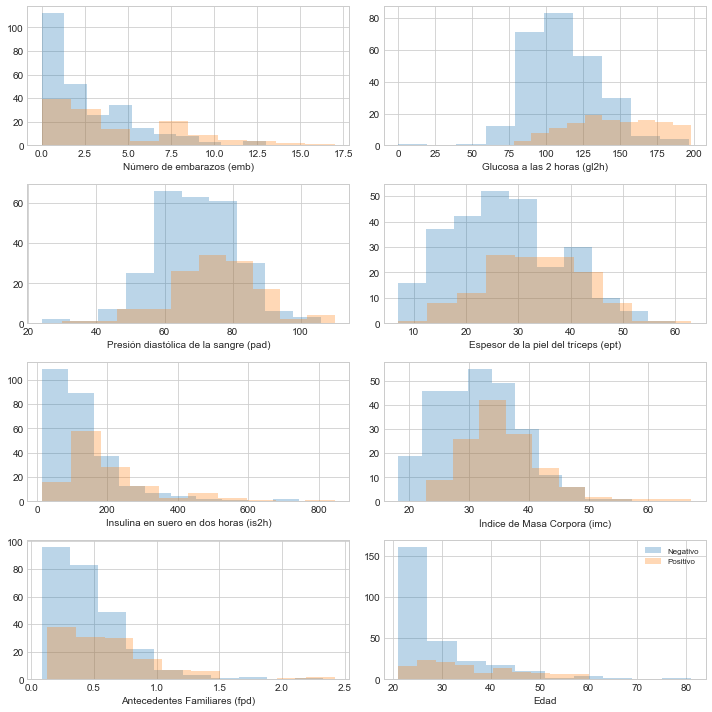

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

X = dfPID.dropna()[list(['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad'])].values
Y = dfPID.dropna()['class'].values

label_dict = {0: 'Negativo',
              1: 'Positivo'}

feature_dict = {0: 'Número de embarazos (emb)',
                1: 'Glucosa a las 2 horas (gl2h)',
                2: 'Presión diastólica de la sangre (pad)',
                3: 'Espesor de la piel del tríceps (ept)',
                4: 'Insulina en suero en dos horas (is2h)',
                5: 'Índice de Masa Corpora (imc)',
                6: 'Antecedentes Familiares (fpd)',
                7: 'Edad'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    for cnt in range(8):
        plt.subplot(4, 2, cnt+1)
        for lab in (0, 1):
            plt.hist(X[Y==lab, cnt],
                     label=label_dict[lab],
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

Estas gráficas no son concluyentes: En efecto, 'is2h' y 'ept' muestran una baja capacidad de discriminación, sin embargo, las variables restantes no muestran un comportamiento claramente superior.

Para formalizar este análisis y para responder la segunda pregunta, acerca del grado de asociación entre variables, se hace uso de medidas de correlación. La medida de correlación más común es el **coeficiente de correlación de Pearson**, la cual proporciona una medida de la relación lineal entre dos variables aleatorias cuantitativas $X$ y $Y$. El coeficiente de correlación de Pearson se define como:

$$r_{xy}=\frac{\sum \limits_{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}
=\frac {\sum \limits_{i=1}^n (x_i - {\bar {x}})(y_i-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^n (x_i-{\bar {x}})^2 \sum \limits _{i=1}^n (y_i-{\bar {y}})^2} }$$

Un valor de 1 implica una correlación directa total: cuando una variable crece la otra crece en la misma proporción. Si el coeficiente toma un valor de 0, entonces no hay correlación lineal entre las variables. Un valor de -1 representa una correlación inversa total: cuando una variable aumenta, la otra disminuye en la misma proporción.

![](images/pearson.jpg)
Imagen: [http://www.utas.edu.au/__data/assets/image/0003/629580/6.jpg]
(http://www.utas.edu.au/__data/assets/image/0003/629580/6.jpg)

A continuación se calcula la matriz de correlación para los atributos del Pima Indians Diabetes Dataset:

In [10]:
display(dfPID.corr(method='pearson'))

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
emb,1.000,0.129,0.217,0.100,0.082,0.022,-0.034,0.544,0.222
gl2h,0.129,1.000,0.227,0.211,0.580,0.218,0.137,0.264,0.467
pad,0.217,0.227,1.000,0.228,0.098,0.296,0.001,0.334,0.173
ept,0.100,0.211,0.228,1.000,0.185,0.648,0.115,0.167,0.259
is2h,0.082,0.580,0.098,0.185,1.000,0.228,0.130,0.220,0.303
imc,0.022,0.218,0.296,0.648,0.228,1.000,0.153,0.026,0.312
fpd,-0.034,0.137,0.001,0.115,0.130,0.153,1.000,0.034,0.174
edad,0.544,0.264,0.334,0.167,0.220,0.026,0.034,1.000,0.238
class,0.222,0.467,0.173,0.259,0.303,0.312,0.174,0.238,1.000


Llaman la atención 3 elementos en esta tabla, señalados en la imagen siguiente:

![](images/pearson2.png)

El primer elemento que llama la atención, estadísticamente, aunque no biológicamente, es la moderadamente alta correlación entre las variables 'ept' e 'imc', lo cual ofrece cierta confianza en poder eliminar este atributo sin perder demasiada capacidad de discriminación. La situación con la variable 'is2h' es menos clara con un valor de correlación de 0.580 (correlación moderada) con la variable 'gl2h' (también esperado clínicamente), sin embargo, el tercer elemento que llama la atención es que esta variable ('gl2h') tiene mayor correlación con la clasificación ('class') de diabético o no diabético que 'is2h' y que cualquiera de los otros atributos, de manera que hay cierta confianza en que se puede prescindir también de 'is2h'.

El análisis de correlación de las variables en el conjunto de datos Pima Indians Diabetes Dataset da un buen grado de confianza en que podemos eliminar las variables 'ept' e'is2h' que contienen una gran porcentaje de valores faltantes y así poder utilizar la totalidad de los registros en el conjunto de datos. 

In [11]:
from sklearn.naive_bayes import GaussianNB

dfPID_cut_pure = dfPID[list(['emb', 'gl2h', 'pad', 'imc', 'fpd', 'edad'])]
dfPID_cut_class = dfPID[list(['class'])]

cut = dfPID_cut_pure.shape[0] // 4 * 3
train_set = dfPID_cut_pure.head(cut).values
train_targets = dfPID_cut_class.head(cut).values.ravel()
test_set = dfPID_cut_pure.tail(dfPID.shape[0]-cut).values
test_targets = dfPID_cut_class.tail(dfPID.shape[0]-cut).values.ravel()

clf = GaussianNB()

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto de entrenamiento: 138 de 576 (23.958333333333332%)

Puntos mal clasificados en el conjunto de prueba: 44 de 192 (22.916666666666668%)



Tratemos de recuperar 'ept'

In [12]:
media = dfPID.mean()
sigma = dfPID.std()
dfPID = (dfPID - media) / sigma

dfX = dfPID[list(['emb', 'gl2h', 'pad', 'ept', 'imc', 'fpd', 'edad', 'class'])]
X = dfX.dropna()[list(['emb', 'gl2h', 'pad', 'imc', 'fpd', 'edad', 'class'])].values
Y = dfX.dropna()['ept'].values

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10, weights='distance')
neigh.fit(X, Y)

dfXNull = dfX.loc[dfX['ept'].isnull()]
indexes = dfXNull.index.values.tolist()
for v in indexes:
    x = dfX[list(['emb', 'gl2h', 'pad', 'imc', 'fpd', 'edad', 'class'])].iloc[[v]].values
    dfPID.iloc[[v], 3] = neigh.predict(x)

dfPID = (dfPID * sigma + media).round(5)
display(dfPID.describe().round(5))

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
count,768.000,768.000,768.000,768.000,394.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,72.327,29.083,155.548,32.457,0.472,33.241,0.349
std,3.370,31.973,12.165,9.335,118.776,6.875,0.331,11.760,0.477
min,-0.000,0.000,24.000,7.000,14.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,23.000,76.250,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,29.000,125.000,32.400,0.372,29.000,0.000
75%,6.000,140.250,80.000,34.937,190.000,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [13]:
dfPID_cut_pure = dfPID[list(['emb', 'gl2h', 'pad', 'ept', 'imc', 'fpd', 'edad'])]
dfPID_cut_class = dfPID[list(['class'])]

cut = dfPID_cut_pure.shape[0] // 4 * 3
train_set = dfPID_cut_pure.head(cut).values
train_targets = dfPID_cut_class.head(cut).values.ravel()
test_set = dfPID_cut_pure.tail(dfPID.shape[0]-cut).values
test_targets = dfPID_cut_class.tail(dfPID.shape[0]-cut).values.ravel()

clf = GaussianNB()

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto de entrenamiento: 147 de 576 (25.520833333333332%)

Puntos mal clasificados en el conjunto de prueba: 50 de 192 (26.041666666666668%)



### Componentes principales

El análisis de componentes principales es una herramienta que permite evaluar la capacidad discriminativa de las variables que describen un conjunto de datos. Una consecuencia de este análisis, es la posibilidad de reducir las dimensiones del conjunto de datos (típicamente grande) con una pérdida de información mínima. Estas variables se conocen como las "*componentes principales*" del conjunto de datos y pueden ser un subconjunto de las variables originales o un nuevo conjunto de variables.

El método de análisis de componentes principales se puede describir mediante los siguientes pasos:

<div style="color: #0000FF; width: 500px; margin-left: 10%; margin-top: 16pt; margin-bottom: 16pt; background-color:#f7f7f7;" >
<ol>
<li>Estandarizar los datos.</li>
<li>Obtener los eigenvectores y los eigenvalores.</li>
<li>Ordenar los valores propios en orden descendente y seleccionar los $k$ vectores propios correspondientes a los $k$ valores propios, siendo $k$ la nueva dimensionalidad del conjunto de datos.</li>
<li>Construir la matriz de proyección del conjunto de $k$ eigenvectores seleccionados.</li>
<li>Transformar el conjunto original de datos $X$ a través de $W$ para obtener el espacio $k$-dimensional deseado.</li>
</ol>
</div>

Si todos los eigenvalores tienen magnitudes similares quiere decir que el espacio de características es el adecuado. Si por otro lado, hay eigenvalores mucho más grandes que otros, nos interesaría conservar esos eigenvectores. Si un eigenvalor es muy pequeño, pudiéramos descartar ese eigenvector.

Calculemos, como ejemplo, las componentes principales para las variables de entrada de los datos de diabetes originales, sin datos con valores faltantes.

Como primer paso, estandarizaremos los datos, usando la biblioteca *sklearn*:

In [ ]:
names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class']
dfPIDpca = pd.read_csv("Data sets/Pima Indian Data Set/pima-indians-diabetes.data", 
                    names=names)

dfPIDpca.loc[dfPIDpca['pad'] == 0,'pad'] = np.nan
dfPIDpca.loc[dfPIDpca['ept'] == 0,'ept'] = np.nan
dfPIDpca.loc[dfPIDpca['is2h'] == 0,'is2h'] = np.nan
dfPIDpca.loc[dfPIDpca['imc'] == 0,'imc'] = np.nan
dfPIDpca = dfPIDpca.dropna()

newnames = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad']
dfXpca = dfPIDpca[newnames]
Xpca = dfXpca.values

#Estandarización
from sklearn import preprocessing
X_std = preprocessing.StandardScaler().fit_transform(Xpca)

Una manera de calcular los eigenvectores y eigenvalores es a través de la matriz de covarinaza ([aquí una referencia](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/)).Entonces, construimos a continuación la matriz de covarianza (utilizando el método de [NumPy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.cov.html)):

In [84]:
# Impresión fancy
def fancy_display_cov(cov_mat):
    num_cols = cov_mat.shape[0]
    html_str = "<table><tr><th></th>"
    for label in range(num_cols):
        html_str += '<th>' + names[label] + '</th>'
    html_str += '</tr>'
    for label in range(num_cols):
        html_str += '<tr><th>' + names[label] + '</th>'
        for col in range(num_cols):
            html_str += '<th style="font-weight: normal;">' 
            html_str += str(cov_mat[label][col].round(4)) + '</th>'
        html_str += "</tr>"


    html_str += "</table>"
    display(HTML(html_str))

# Matriz de Covarianza
cov_mat = np.cov(X_std.T)

print('Matriz de Covarianza:')
fancy_display_cov(cov_mat)

Matriz de Covarianza:


,emb,gl2h,pad,ept,is2h,imc,fpd,edad
emb,1.0026,0.2019,0.2133,0.0949,0.0811,-0.024,0.0088,0.6819
gl2h,0.2019,1.0026,0.2038,0.2039,0.5815,0.2134,0.1442,0.347
pad,0.2133,0.2038,1.0026,0.2323,0.0978,0.3044,-0.0164,0.2998
ept,0.0949,0.2039,0.2323,1.0026,0.1847,0.6666,0.1621,0.17
is2h,0.0811,0.5815,0.0978,0.1847,1.0026,0.2286,0.1378,0.2198
imc,-0.024,0.2134,0.3044,0.6666,0.2286,1.0026,0.1602,0.0717
fpd,0.0088,0.1442,-0.0164,0.1621,0.1378,0.1602,1.0026,0.0867
edad,0.6819,0.347,0.2998,0.17,0.2198,0.0717,0.0867,1.0026


De aquí, calculamos los eigenvectores y los eigenvalores:

In [85]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)

print('\nEigenvalues')
for label in range(8):
    print(names[label],"\t", end="")
print()
for label in range(8):
    print(eig_vals[label].round(4),"\t", end="")
print()

Eigenvectors 
[[-0.31503642 -0.55295744  0.21303985  0.19836382 -0.24624058  0.09748799
  -0.63305373 -0.19839504]
 [-0.42453002 -0.04572737 -0.4699538  -0.23190928  0.05934175 -0.72487629
  -0.09014637 -0.07714493]
 [-0.32570154 -0.03174729  0.40287801 -0.29997414  0.77595544  0.08848829
  -0.10152886  0.14272461]
 [-0.38379508  0.41179049  0.29948885  0.09316775 -0.38345656 -0.11154265
  -0.10827577  0.64307992]
 [-0.365119    0.06810404 -0.57664333 -0.26864899 -0.05988106  0.66062747
  -0.06660476  0.11362021]
 [-0.36830109  0.50385343  0.25689442 -0.02969667 -0.14245795  0.07712037
   0.11036396 -0.71076535]
 [-0.16934811  0.18832469 -0.26493909  0.84313407  0.38865075  0.02716458
  -0.05433761  0.0068815 ]
 [-0.41171568 -0.47706934  0.11422865  0.15580738 -0.10848477  0.04079707
   0.74129339  0.05120245]]

Eigenvalues
emb 	gl2h 	pad 	ept 	is2h 	imc 	fpd 	edad 	
2.5724 	1.558 	1.2002 	0.9552 	0.7221 	0.4043 	0.2968 	0.3115 	


Podemos observar de estos valores que las variables más importantes, en los datos completos, son 'emb' y 'gl2h' (son las variables que tienen mayor capacidad discriminante), mientras que las menos discriminantes son 'fpd'  y 'edad'. Las variables con más valores faltantes, 'is2h' y 'ept', quedan más cargados a la mitad del ranking. A continuación mostramos gráficamente la aportación discriminante 

[32.073658833660254,
 19.425253064111001,
 14.964401963664914,
 11.909432323190751,
 9.0029379074525018,
 5.0404827059083166,
 3.7000012495437837,
 3.8838319524684874]

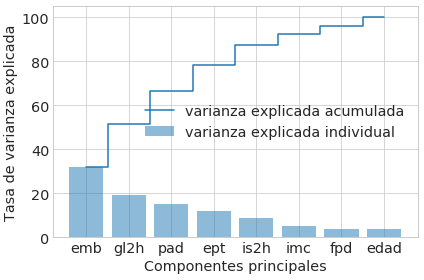

In [86]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)
display(var_exp)

x = range(8)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.xticks(x, names)

    plt.bar(x, var_exp, alpha=0.5, align='center', label='varianza explicada individual')
    plt.step(x, cum_var_exp, where='mid', label='varianza explicada acumulada')
    plt.ylabel('Tasa de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.legend(loc='best')
    plt.tight_layout()

El siguiente paso, consiste en ordenar los eigenvectores por magnitud del eigenvalor asociado:

In [87]:
# Crear duplas (eigenvalue, eigenvector) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos la lista de mayor a menor
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Parejas en orden descendiente por eigenvalor:')
for i in eig_pairs:
    print(i[0], "\t", i[1])

Parejas en orden descendiente por eigenvalor:
2.57243835135 	 [-0.31503642 -0.42453002 -0.32570154 -0.38379508 -0.365119   -0.36830109
 -0.16934811 -0.41171568]
1.55798458249 	 [-0.55295744 -0.04572737 -0.03174729  0.41179049  0.06810404  0.50385343
  0.18832469 -0.47706934]
1.20020611668 	 [ 0.21303985 -0.4699538   0.40287801  0.29948885 -0.57664333  0.25689442
 -0.26493909  0.11422865]
0.955185082248 	 [ 0.19836382 -0.23190928 -0.29997414  0.09316775 -0.26864899 -0.02969667
  0.84313407  0.15580738]
0.722072366863 	 [-0.24624058  0.05934175  0.77595544 -0.38345656 -0.05988106 -0.14245795
  0.38865075 -0.10848477]
0.404267286413 	 [ 0.09748799 -0.72487629  0.08848829 -0.11154265  0.66062747  0.07712037
  0.02716458  0.04079707]
0.311499174963 	 [-0.19839504 -0.07714493  0.14272461  0.64307992  0.11362021 -0.71076535
  0.0068815   0.05120245]
0.296755202259 	 [-0.63305373 -0.09014637 -0.10152886 -0.10827577 -0.06660476  0.11036396
 -0.05433761  0.74129339]


A continuación, creamos la matriz de proyección (que no es otra cosa que la concatenación de los vectores propios seleccionados y ordenados. Por ejemplo, eliminando las dos variables menos descriptivas tendríamos:

In [94]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1),
                      eig_pairs[1][1].reshape(8,1),
                      eig_pairs[2][1].reshape(8,1),
                      eig_pairs[3][1].reshape(8,1),
                      eig_pairs[4][1].reshape(8,1),
                      eig_pairs[5][1].reshape(8,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.31503642 -0.55295744  0.21303985  0.19836382 -0.24624058  0.09748799]
 [-0.42453002 -0.04572737 -0.4699538  -0.23190928  0.05934175 -0.72487629]
 [-0.32570154 -0.03174729  0.40287801 -0.29997414  0.77595544  0.08848829]
 [-0.38379508  0.41179049  0.29948885  0.09316775 -0.38345656 -0.11154265]
 [-0.365119    0.06810404 -0.57664333 -0.26864899 -0.05988106  0.66062747]
 [-0.36830109  0.50385343  0.25689442 -0.02969667 -0.14245795  0.07712037]
 [-0.16934811  0.18832469 -0.26493909  0.84313407  0.38865075  0.02716458]
 [-0.41171568 -0.47706934  0.11422865  0.15580738 -0.10848477  0.04079707]]


Cada columna en esta matriz corresponde a uno de los eigenvectores reservados. El siguiente paso es utilizar esta matriz para transformar los datos estandarizados (X_std) al nuevo espacio de características (definido por la matriz de proyección matrix_w):

In [95]:
X_pca = X_std.dot(matrix_w)

A continuación, repetiremos el ejercicio de clasificación con los datos originales limpios y con los nuevos datos transformados:

In [98]:
dfPID_cut_pure = dfPIDpca[list(['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad'])]
dfPID_cut_class = dfPIDpca[list(['class'])]

cut = dfPID_cut_pure.shape[0] // 4 * 3
train_set = dfPID_cut_pure.head(cut).values
train_targets = dfPID_cut_class.head(cut).values.ravel()
test_set = dfPID_cut_pure.tail(dfPIDpca.shape[0]-cut).values
test_targets = dfPID_cut_class.tail(dfPIDpca.shape[0]-cut).values.ravel()

clf = GaussianNB()

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto de entrenamiento: 70 de 294 (23.80952380952381%)

Puntos mal clasificados en el conjunto de prueba: 22 de 99 (22.22222222222222%)



In [100]:
train_set = X_pca[:cut]
test_set = X_pca[cut:]

clf = GaussianNB()

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto de entrenamiento: 69 de 294 (23.46938775510204%)

Puntos mal clasificados en el conjunto de prueba: 20 de 99 (20.2020202020202%)


Como puede observarse, los resultados no son concluyentes (apenas una mejora marginal), aunque al menos confirmamos que las descripciones son equivalentes. La pobre mejora puede explicarse de acuerdo a tres posibilidades:

1. La primera razón es que la cantidad de datos es muy pequeña. 
2. Una segunda posible razón es el uso de un clasificador que posiblemente no sea el más adecuado.
3. La tercera razón, es una que debe resaltarse: Las bases del análisis de componentes principales asumen una correlación lineal enntre las variables. Mientras el problema se aleje más de esta hipótesis, menos válido es el resultado. Esta es una consideración importante al momento de determinar la viabilidad la técnica. 


### Otras transformaciones:


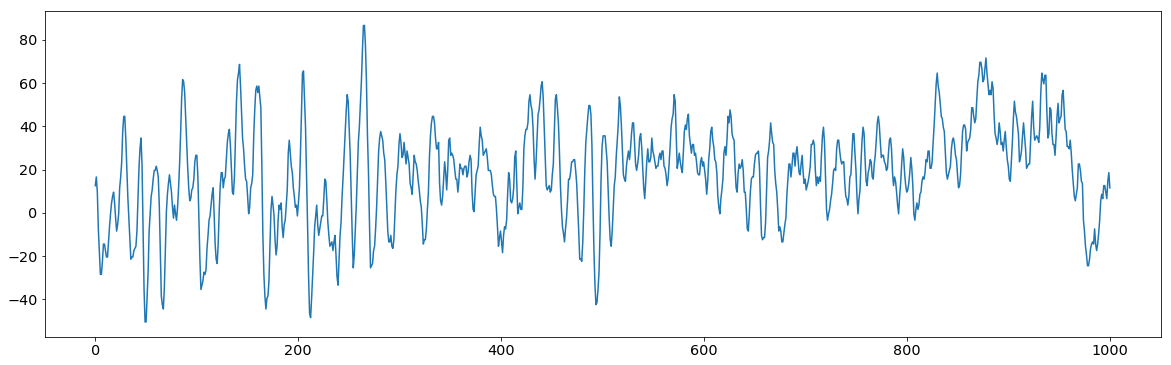

In [43]:
from PIL import Image
from IPython.display import HTML
from io import BytesIO
from base64 import b64encode
import scipy.io as sio
from sklearn import preprocessing
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


interictal_example = sio.loadmat('Data sets/Luis/1_10_1.mat')
interictal_example_data = interictal_example["dataStruct"][0][0][0]

fig = plt.figure(figsize=(20, 6))
ax = plt.axes()

x = np.linspace(0, 1000, 1000)
ax.plot(x, np.transpose(interictal_example_data[:1000])[0])
plt.show()

In [104]:
print(len(interictal_example_data))

240000


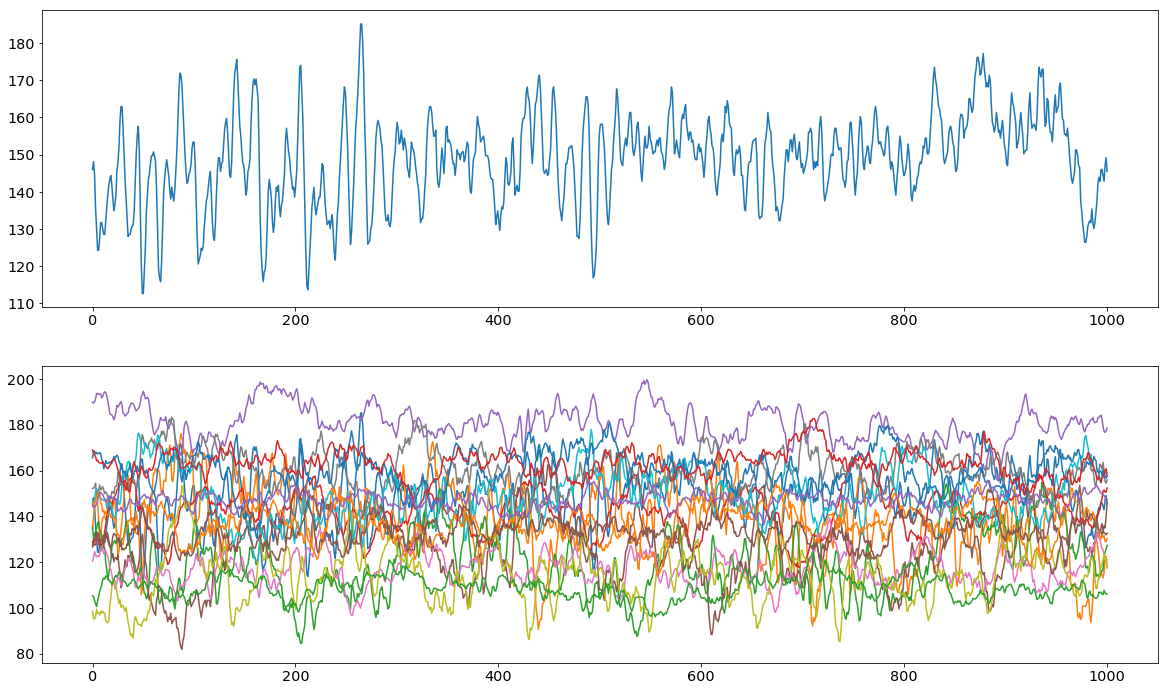

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()

data_minmax = [0]*16
for i in range(16):
    data_minmax[i] = 256*min_max_scaler.fit_transform(
        np.transpose(interictal_example_data)[i].reshape(-1, 1)).ravel()

fig2 = plt.figure(figsize=(20, 12))
ax1 = fig2.add_subplot(211)
ax1.plot(x, data_minmax[0][:1000])

ax2 = fig2.add_subplot(212)
for i in range(16):
    ax2.plot(x, data_minmax[i][:1000])

plt.show()

In [45]:
w, h = 1000, 16
data = [0] * 16
for i in range(16):
    data[i] = data_minmax[i][:1000]

img = Image.fromarray(np.asarray(data), 'RGB')
img.save('my.png')
b = BytesIO()  
img.save(b, format='png')
HTML("<img src='data:image/png;base64,{0}'/>".format(b64encode(b.getvalue()).decode('utf-8')))

In [51]:
m00, m10, m01 = 0, 0, 0
for x in range(h):
    for y in range(w):
        m00 += data[x][y]
        m10 += x*data[x][y]
        m01 += y*data[x][y]
xm = m10/m00
ym = m01/m00
        
mu00, mu02, mu03, mu11, mu12, mu20, mu21, mu30 = m00, 0, 0, 0, 0, 0, 0, 0
for x in range(h):
    xterm = x - xm
    for y in range(w):
        yterm = y - ym
        mu02 += yterm**2 * data[x][y]
        mu03 += yterm**3 * data[x][y]
        mu11 += xterm * yterm * data[x][y]
        mu12 += xterm * yterm**2 * data[x][y]
        mu20 += xterm**2 * data[x][y]
        mu21 += xterm**2 * yterm * data[x][y]
        mu30 += xterm**3 * data[x][y]

        
mu02 /= mu00**2
mu03 /= mu00**2.5
mu11 /= mu00**2
mu12 /= mu00**2.5
mu20 /= mu00**2
mu21 /= mu00**2.5
mu30 /= mu00**2.5
        
moments = [0] * 8

#First moment
moments[0] = mu20 + mu02

#Second moment
moments[1] = (mu20 - mu02)**2 + 4 * mu11**2

#Third moment
moments[2] = (mu30 - 3 * mu12)**2 + (3 * mu21 - mu03)**2

#Fourth moment
moments[3] = (mu30 + mu12)**2 + (mu12 + mu03)**2

#Fifth moment
moments[4] = (mu30 - 3 * mu12) * (mu30 + mu12) * ((mu30 + mu12)**2 - 3 * (mu21 + mu03)**2) \
+ (3 * mu21 - mu03) * (mu21 + mu03) * (3 * (mu30 + mu12)**2 - (mu21 + mu03)**2)

#Sixth moment
moments[5] = (mu20 - mu02) * ((mu30 + mu12)**2 - (mu21 + mu03)**2) \
+ 4 * mu11 * (mu30 + mu12) * (mu21 + mu03);

#Seventh moment
moments[6] = (3 * mu21 - mu03) * (mu30 + mu12) * ((mu30 + mu12)**2 \
- 3 * (mu21 + mu03)**2) + (mu30 - 3 * mu12) * (mu21 + mu03) \
* (3 * (mu30 + mu12)**2 - (mu21 + mu03)**2)

#Eighth moment
moments[7] = mu11 * ((mu30 + mu12)**2 - (mu03 + mu21)**2)\
- (mu20 - mu02) * (mu30 + mu12) * (mu03 + mu21)


In [52]:
print (moments)

[0.03712969076247602, 0.0013772035339191502, 3.0942044821826695e-11, 2.981928473980917e-11, 9.5752551772883667e-22, 1.1476256392551736e-12, -1.0336139020328305e-22, -2.0711654275440841e-14]
